In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


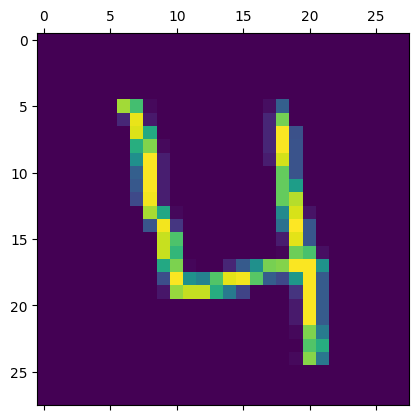

In [72]:
df = pd.read_csv('MNIST Kaggle\\train.csv')
y = df['label']
df_pixel = df.drop(columns=['label'],axis=1)
df_pixel = df_pixel/255
digit = np.array(df_pixel.iloc[3])
plt.matshow(digit.reshape((28,28)))



In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [79]:
model = Sequential([
    Dense(784,activation='sigmoid',input_shape=(784,)),
    Dropout(0.1),
    Dense(256,activation='tanh'),
    Dropout(0.1),
    Dense(128,activation='tanh'),
    Dropout(0.1),
    Dense(10,activation='softmax'),
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(df_pixel,y,epochs=30)

c:\Users\samiu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7917 - loss: 0.6499
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9454 - loss: 0.1762
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9632 - loss: 0.1149
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9752 - loss: 0.0819
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9793 - loss: 0.0656
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9843 - loss: 0.0503
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9870 - loss: 0.0415
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9886 - loss: 0.0341
Epoch 9/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9924 - loss: 0.0246
Epoch 10/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9926 - loss: 0.0222
Epoch 11/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9920 - loss: 0.0236
Epoch 12/30
1313/1313 ━━━━━━━━

In [80]:
test_file = pd.read_csv('MNIST Kaggle\\test.csv')
test_rows = test_file.shape[0]

# model.evaluate(x_test_flatten,y_test)
# 0.9659 

In [81]:
y_pred = model.predict(test_file)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [82]:
y_pred_number = [np.argmax(i) for i in y_pred]
y_pred_number[3]

9

In [84]:
image_ids = range(1,(test_rows+1))
df_sumbission = pd.DataFrame({
    'ImageId': image_ids,
    'Label': y_pred_number
})
df_sumbission.to_csv('MNIST kaggle.csv',index=False)
